# **Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from spellchecker import SpellChecker

# **Load data**

In [2]:
train = pd.read_csv('/kaggle/input/learning-agency-lab-automated-essay-scoring-2/train.csv', index_col='essay_id')
test = pd.read_csv('/kaggle/input/learning-agency-lab-automated-essay-scoring-2/test.csv', index_col='essay_id')

In [3]:
train

,full_text,score
essay_id,,
000d118,Many people have car where they live. The thin...,3
000fe60,I am a scientist at NASA that is discussing th...,3
001ab80,People always wish they had the same technolog...,4
001bdc0,"We all heard about Venus, the planet without a...",4
002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3
...,...,...
ffd378d,"the story "" The Challenge of Exploing Venus "" ...",2
ffddf1f,Technology has changed a lot of ways that we l...,4
fff016d,If you don't like sitting around all day than ...,2


In [4]:
test

,full_text
essay_id,
000d118,Many people have car where they live. The thin...
000fe60,I am a scientist at NASA that is discussing th...
001ab80,People always wish they had the same technolog...


# **Define target variable and encode it**

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(train['score'])

# **Token hóa các đoạn thành list các từ, các dấu**

In [6]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# stop_words = set(stopwords.words('english'))
train['tokens'] = train['full_text'].apply(word_tokenize)
test['tokens'] = test['full_text'].apply(word_tokenize)

In [7]:
train

,full_text,score,tokens
essay_id,,,
000d118,Many people have car where they live. The thin...,3,"[Many, people, have, car, where, they, live, ...."
000fe60,I am a scientist at NASA that is discussing th...,3,"[I, am, a, scientist, at, NASA, that, is, disc..."
001ab80,People always wish they had the same technolog...,4,"[People, always, wish, they, had, the, same, t..."
001bdc0,"We all heard about Venus, the planet without a...",4,"[We, all, heard, about, Venus, ,, the, planet,..."
002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3,"[Dear, ,, State, Senator, This, is, a, letter,..."
...,...,...,...
ffd378d,"the story "" The Challenge of Exploing Venus "" ...",2,"[the, story, ``, The, Challenge, of, Exploing,..."
ffddf1f,Technology has changed a lot of ways that we l...,4,"[Technology, has, changed, a, lot, of, ways, t..."
fff016d,If you don't like sitting around all day than ...,2,"[If, you, do, n't, like, sitting, around, all,..."


In [8]:
test

,full_text,tokens
essay_id,,
000d118,Many people have car where they live. The thin...,"[Many, people, have, car, where, they, live, ...."
000fe60,I am a scientist at NASA that is discussing th...,"[I, am, a, scientist, at, NASA, that, is, disc..."
001ab80,People always wish they had the same technolog...,"[People, always, wish, they, had, the, same, t..."


# **Hàm đếm tổng số từ sai chính tả trong đoạn**

In [9]:
spell_checker = SpellChecker()
def count_errors(tokens):
    misspelled = spell_checker.unknown(token for token in tokens if token.isalpha())
    return len(misspelled)
train['count_spelling_errors'] = train['tokens'].apply(lambda x: count_errors(x))
test['count_spelling_errors'] = test['tokens'].apply(lambda x: count_errors(x))

In [10]:
train

,full_text,score,tokens,count_spelling_errors
essay_id,,,,
000d118,Many people have car where they live. The thin...,3,"[Many, people, have, car, where, they, live, ....",16
000fe60,I am a scientist at NASA that is discussing th...,3,"[I, am, a, scientist, at, NASA, that, is, disc...",7
001ab80,People always wish they had the same technolog...,4,"[People, always, wish, they, had, the, same, t...",7
001bdc0,"We all heard about Venus, the planet without a...",4,"[We, all, heard, about, Venus, ,, the, planet,...",2
002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3,"[Dear, ,, State, Senator, This, is, a, letter,...",8
...,...,...,...,...
ffd378d,"the story "" The Challenge of Exploing Venus "" ...",2,"[the, story, ``, The, Challenge, of, Exploing,...",10
ffddf1f,Technology has changed a lot of ways that we l...,4,"[Technology, has, changed, a, lot, of, ways, t...",13
fff016d,If you don't like sitting around all day than ...,2,"[If, you, do, n't, like, sitting, around, all,...",1


In [11]:
test

,full_text,tokens,count_spelling_errors
essay_id,,,
000d118,Many people have car where they live. The thin...,"[Many, people, have, car, where, they, live, ....",16
000fe60,I am a scientist at NASA that is discussing th...,"[I, am, a, scientist, at, NASA, that, is, disc...",7
001ab80,People always wish they had the same technolog...,"[People, always, wish, they, had, the, same, t...",7


# **Extract features**

In [12]:
class FeatureExtract:
    def __init__(self):
        pass
    
    #tính tổng số từ trong đoạn
    def word_count(self, text):
        return len(text.split())
    
    #tính tổng số câu trong đoạn
    def sen_count(self, text):
        return len(text.split('.'))
    
    #tính độ dài trung bình của từng từ
    def ave_word_length(self, text):
        words = text.split()
        total_length = 0
        for word in words:
            total_length += len(word)
        if len(words) == 0:
            return 0
        else:
            return total_length / len(words)
    
#     #tính tổng số stopwords trong đoạn
#     def total_stopwords(self, text):
#         words = text.split()
#         stopwords = [word for word in words if len(word) > 1 and word.isalpha() and word.lower() in stop_words]
#         return len(stopwords)
    
    #độ đa dạng từ vựng trong một đoạn được tính từ tổng số từ là duy nhất trong đoạn văn bản và chia cho tổng số từ của văn bản
    def lexical_diversity(self, text):
        words = text.split()
        if len(words) == 0:
            return 0
        return len(set(words)) / len(words)
    
    def extract_features(self, text):
        features = {
            'word_count': self.word_count(text),
            'sen_count': self.sen_count(text),
            'ave_word_length': self.ave_word_length(text),
            'total_stopwords' : self.total_stopwords(text),
            'count_spelling_errors' : self.count_spelling_errors(text),
            'lexical_diversity': self.lexical_diversity(text),
            'sentiment' : self.sentiment(text),
        }
        return features

# **function to insert features column to dataframe**

In [13]:
def insert_features(df, text):
    extractor = FeatureExtract()
    for feature in ['word_count', 'sen_count', 'ave_word_length', 'lexical_diversity']:
        df[feature] = df[text].apply(lambda x: getattr(extractor, feature)(x))

insert_features(train, 'full_text')
insert_features(test, 'full_text')

In [14]:
train

,full_text,score,tokens,count_spelling_errors,word_count,sen_count,ave_word_length,lexical_diversity
essay_id,,,,,,,,
000d118,Many people have car where they live. The thin...,3,"[Many, people, have, car, where, they, live, ....",16,498,14,4.369478,0.508032
000fe60,I am a scientist at NASA that is discussing th...,3,"[I, am, a, scientist, at, NASA, that, is, disc...",7,332,20,4.018072,0.533133
001ab80,People always wish they had the same technolog...,4,"[People, always, wish, they, had, the, same, t...",7,550,25,4.574545,0.460000
001bdc0,"We all heard about Venus, the planet without a...",4,"[We, all, heard, about, Venus, ,, the, planet,...",2,451,24,4.982262,0.556541
002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3,"[Dear, ,, State, Senator, This, is, a, letter,...",8,373,16,4.873995,0.434316
...,...,...,...,...,...,...,...,...
ffd378d,"the story "" The Challenge of Exploing Venus "" ...",2,"[the, story, ``, The, Challenge, of, Exploing,...",10,157,10,4.445860,0.617834
ffddf1f,Technology has changed a lot of ways that we l...,4,"[Technology, has, changed, a, lot, of, ways, t...",13,579,29,4.770294,0.480138
fff016d,If you don't like sitting around all day than ...,2,"[If, you, do, n't, like, sitting, around, all,...",1,215,16,4.213953,0.553488


In [15]:
test

,full_text,tokens,count_spelling_errors,word_count,sen_count,ave_word_length,lexical_diversity
essay_id,,,,,,,
000d118,Many people have car where they live. The thin...,"[Many, people, have, car, where, they, live, ....",16,498,14,4.369478,0.508032
000fe60,I am a scientist at NASA that is discussing th...,"[I, am, a, scientist, at, NASA, that, is, disc...",7,332,20,4.018072,0.533133
001ab80,People always wish they had the same technolog...,"[People, always, wish, they, had, the, same, t...",7,550,25,4.574545,0.460000


In [16]:
features = ['count_spelling_errors', 'word_count', 'sen_count', 'ave_word_length', 'lexical_diversity']
X = train[features]
X_test = test[features]

In [17]:
print("Value of X:")
print(X.head())

Value of X:
          count_spelling_errors  word_count  sen_count  ave_word_length  \
essay_id                                                                  
000d118                      16         498         14         4.369478   
000fe60                       7         332         20         4.018072   
001ab80                       7         550         25         4.574545   
001bdc0                       2         451         24         4.982262   
002ba53                       8         373         16         4.873995   

          lexical_diversity  
essay_id                     
000d118            0.508032  
000fe60            0.533133  
001ab80            0.460000  
001bdc0            0.556541  
002ba53            0.434316  


In [18]:
print("\nValue of X_test:")
print(X_test.head())


Value of X_test:
          count_spelling_errors  word_count  sen_count  ave_word_length  \
essay_id                                                                  
000d118                      16         498         14         4.369478   
000fe60                       7         332         20         4.018072   
001ab80                       7         550         25         4.574545   

          lexical_diversity  
essay_id                     
000d118            0.508032  
000fe60            0.533133  
001ab80            0.460000  


# **Split data into train and validation sets**

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print("Value of X_train:")
print(X_train.head())

Value of X_train:
          count_spelling_errors  word_count  sen_count  ave_word_length  \
essay_id                                                                  
be29f81                      11         488         30         5.059426   
be96267                       6         219         17         4.068493   
417a337                       3         182         11         4.439560   
dcf3a1e                       5         459         25         4.727669   
9d04b4e                       8         386         35         4.336788   

          lexical_diversity  
essay_id                     
be29f81            0.413934  
be96267            0.547945  
417a337            0.664835  
dcf3a1e            0.485839  
9d04b4e            0.445596  


In [21]:
print("\nValue of X_valid:")
print(X_valid.head())


Value of X_valid:
          count_spelling_errors  word_count  sen_count  ave_word_length  \
essay_id                                                                  
bb4c434                      17         569         22         4.147627   
44e88b0                       3         365         21         4.742466   
0ba78ec                       6         222         13         4.490991   
f96c287                      10         243         15         4.613169   
317173f                      11         593         27         4.261383   

          lexical_diversity  
essay_id                     
bb4c434            0.442882  
44e88b0            0.575342  
0ba78ec            0.576577  
f96c287            0.703704  
317173f            0.372681  


In [22]:
print("\nValue of y_train:")
print(y_train)


Value of y_train:
[3 1 1 ... 2 1 3]


In [23]:
print("\nValue of y_valid:")
print(y_valid)


Value of y_valid:
[2 2 2 ... 1 1 1]


# **Initialize Gradient Boosting Classifier**

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()

# **Fit the model**

In [25]:
model.fit(X_train, y_train)

GradientBoostingClassifier()

# **Predict on the validation set**

In [26]:
y_pred = model.predict(X_valid)

In [27]:
print("Predicted values on the validation set:")
print(y_pred)

Predicted values on the validation set:
[3 2 1 ... 2 1 1]


# **Inverse transform the predictions because we encode the target variable**

In [28]:
y_pred = le.inverse_transform(y_pred)

# **Calculate Cohen's Kappa score**

In [29]:
from sklearn.metrics import cohen_kappa_score, accuracy_score
kappa_score = cohen_kappa_score(y_valid, y_pred, weights='quadratic')
print("Cohen's Kappa Score:", kappa_score)

Cohen's Kappa Score: 0.4232818680971526


# **Calculate accuracy**

In [30]:
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.15395725014442518


# **Plot actual vs predicted values**

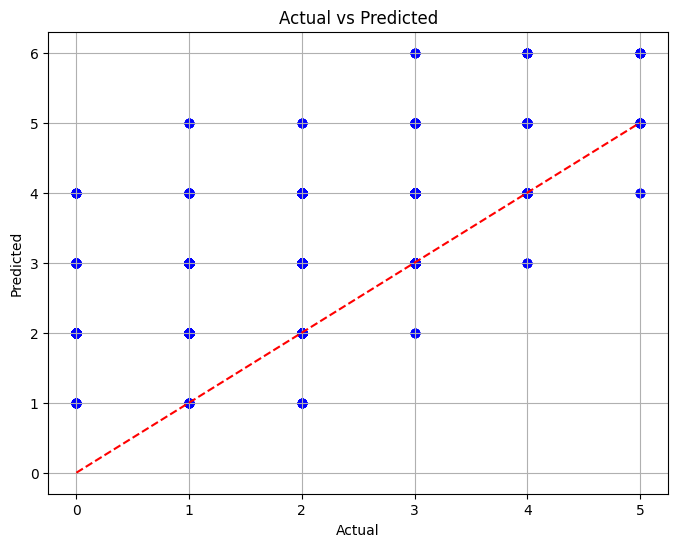

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(y_valid, y_pred, color='blue')
plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()

# **Plot histogram of actual and predicted values**

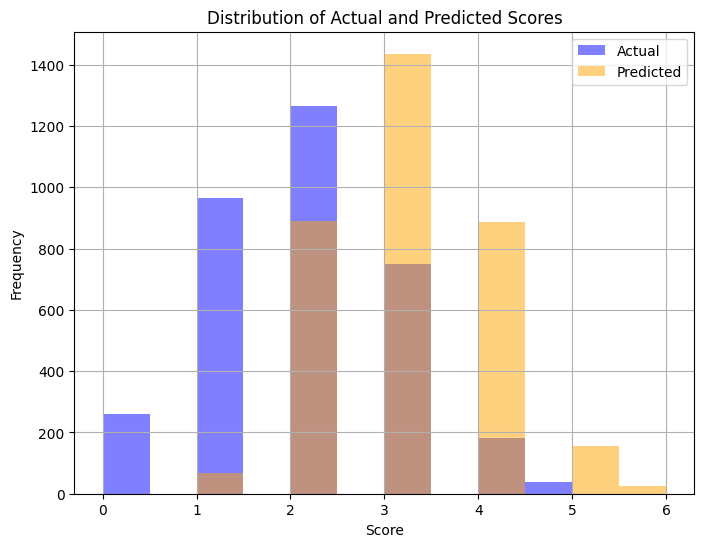

In [32]:
plt.figure(figsize=(8, 6))
plt.hist(y_valid, bins=10, alpha=0.5, label='Actual', color='blue')
plt.hist(y_pred, bins=10, alpha=0.5, label='Predicted', color='orange')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Actual and Predicted Scores')
plt.legend()
plt.grid(True)
plt.show()

# **Make predictions on the test set**

In [33]:
predictions = model.predict(X_test)

In [34]:
print("Predicted values on the test set:")
print(predictions)

Predicted values on the test set:
[3 2 3]


# **Inverse transform the predictions**

In [35]:
predictions = le.inverse_transform(predictions)

In [36]:
predictions

array([4, 3, 4])

# **Plot distribution of predicted scores**

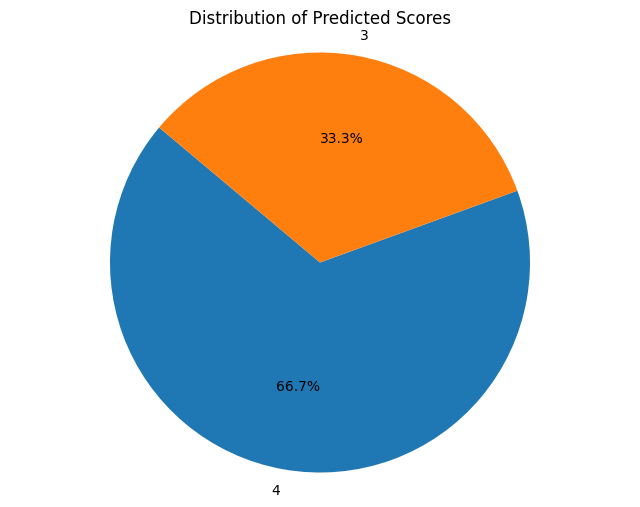

In [37]:
score_counts = pd.Series(predictions).value_counts()
plt.figure(figsize=(8, 6))
plt.pie(score_counts, labels=score_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Predicted Scores')
plt.axis('equal')
plt.show()

# **submission**

In [38]:
submission = pd.DataFrame({'essay_id': test.index, 'score': predictions})
submission.to_csv('submission.csv', index=False)